<a href="https://colab.research.google.com/github/wisawapan/Automatic-email/blob/master/ImageRestoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Salt & Pepper noise

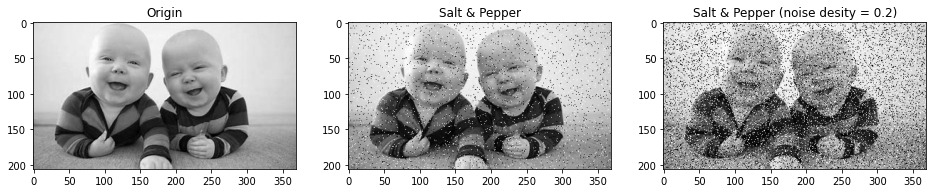

In [1]:
from skimage import io, color
from skimage.util import random_noise

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

sp = random_noise(img_gray, mode='s&p', seed=None, clip=True)
sp2 = random_noise(img_gray, mode='s&p', seed=None, clip=True, amount = 0.2)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
fig.add_subplot(1,3,1), plt.imshow(img_gray, cmap="gray"), plt.title('Origin')
fig.add_subplot(1,3,2), plt.imshow(sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(1,3,3), plt.imshow(sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')
plt.show()


2. Gaussian

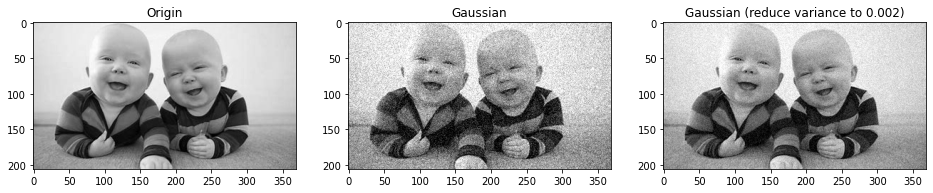

In [ ]:
from skimage import io, color
from skimage.util import random_noise

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

gauss = random_noise(img_gray, mode='gaussian', seed=None, clip=True)
gauss2 = random_noise(img_gray, mode='gaussian', seed=None, clip=True, var = 0.002)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
fig.add_subplot(1,3,1), plt.imshow(img_gray, cmap="gray"), plt.title('Origin')
fig.add_subplot(1,3,2), plt.imshow(gauss, cmap="gray"), plt.title('Gaussian')
fig.add_subplot(1,3,3), plt.imshow(gauss2, cmap="gray"), plt.title('Gaussian (reduce variance to 0.002)')
plt.show()

3. Speckle noise

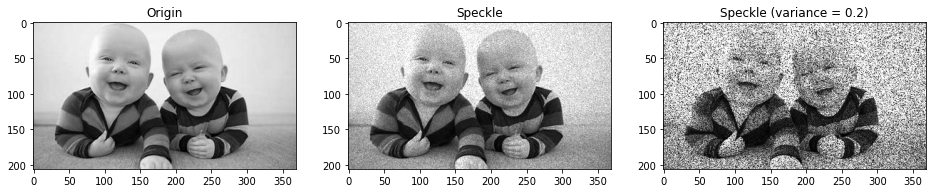

In [ ]:
from skimage import io, color
from skimage.util import random_noise

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

speckle = random_noise(img_gray, mode='speckle', seed=None, clip=True)
speckle2 = random_noise(img_gray, mode='speckle', seed=None, clip=True, var = 0.2 )

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
fig.add_subplot(1,3,1), plt.imshow(img_gray, cmap="gray"), plt.title('Origin')
fig.add_subplot(1,3,2), plt.imshow(speckle, cmap="gray"), plt.title('Speckle')
fig.add_subplot(1,3,3), plt.imshow(speckle2, cmap="gray"), plt.title('Speckle (variance = 0.2)')
plt.show()

4. Periodic noise**

[[0.87884494 0.8631409  0.85528888 ... 0.82192919 0.82978121 0.8258552 ]
 [0.8631409  0.84351086 0.83958485 ... 0.80229915 0.81015117 0.80622516]
 [0.85528888 0.83958485 0.83173283 ... 0.79052112 0.79837314 0.79837314]
 ...
 [0.48821844 0.50392248 0.53140454 ... 0.51766704 0.48625897 0.49999647]
 [0.49999647 0.53533055 0.56281261 ... 0.501963   0.52159305 0.50784848]
 [0.5157005  0.54318256 0.53925656 ... 0.50252913 0.51038115 0.51177449]]
[[1.         1.0009058  1.00181159 ... 1.32548228 1.32633862 1.3271947 ]
 [1.00097561 1.00188141 1.0027872  ... 1.32640461 1.32726067 1.32811645]
 [1.00195122 1.00285701 1.0037628  ... 1.32732663 1.3281824  1.32903789]
 ...
 [1.19675663 1.19764464 1.19853249 ... 1.50516274 1.50594425 1.50672536]
 [1.19771307 1.19860091 1.19948858 ... 1.50600447 1.50678554 1.50756619]
 [1.19866933 1.19955699 1.20044449 ... 1.50684572 1.50762635 1.50840655]]


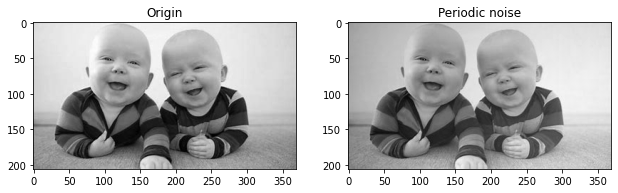

2.304882277291933


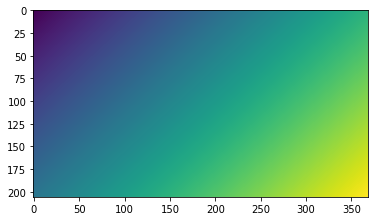

(206, 369)


In [ ]:
from skimage import io, color
import numpy as np

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

nx, ny = np.shape(img_gray)
y = np.linspace(0,1,nx)
x = np.linspace(0,1,ny)
xv, yv = np.meshgrid(x,y)
p = np.sin(xv/3+yv/5)+1

def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    print(out)
    return out

img_pn = im2double(img_gray)+p
print(p)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
fig.add_subplot(1,3,1), plt.imshow(img_gray, cmap="gray"), plt.title('Origin')
fig.add_subplot(1,3,2), plt.imshow(img_pn, cmap="gray"), plt.title('Periodic noise')
plt.show()

print(img_pn.max())
plt.imshow(p)
plt.show()

print(img_pn.shape)

Low-pass filtering

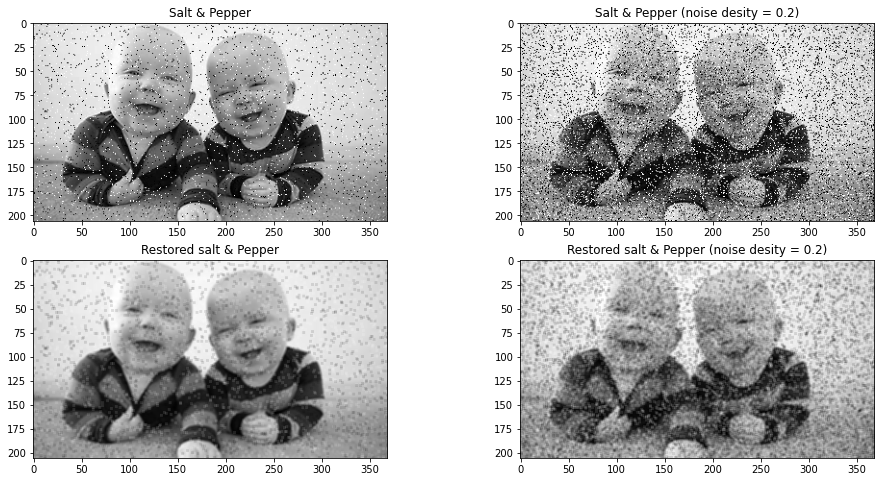

In [ ]:
from skimage import io, color
from skimage.util import random_noise

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

image_sp = random_noise(img_gray, mode='s&p', seed=None, clip=True)
image_sp2 = random_noise(img_gray, mode='s&p', seed=None, clip=True, amount = 0.2)

a3 = np.array([[0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111]])

image_sp_a3 = cv2.filter2D(image_sp, -1, a3)
image_sp2_a3 = cv2.filter2D(image_sp2, -1, a3)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
fig.add_subplot(2,2,1), plt.imshow(image_sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(2,2,2), plt.imshow(image_sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')
fig.add_subplot(2,2,3), plt.imshow(image_sp_a3, cmap="gray"), plt.title('Restored salt & Pepper')
fig.add_subplot(2,2,4), plt.imshow(image_sp2_a3, cmap="gray"), plt.title('Restored salt & Pepper (noise desity = 0.2)')
plt.show()


Low-pass filtering with 3x3 average filter and 7x7 average filter

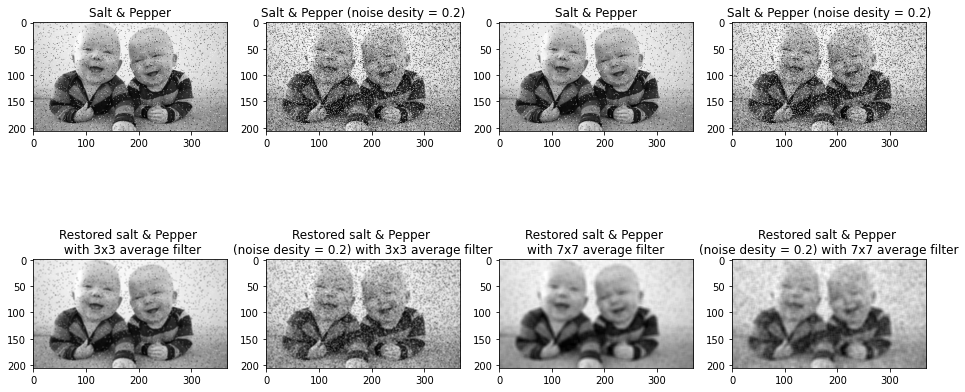

In [ ]:
from skimage import io, color
from skimage.util import random_noise

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

image_sp = random_noise(img_gray, mode='s&p', seed=None, clip=True)
image_sp2 = random_noise(img_gray, mode='s&p', seed=None, clip=True, amount = 0.2)

a3 = np.array([[0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111]])

image_sp_a3 = cv2.filter2D(image_sp, -1, a3)
image_sp2_a3 = cv2.filter2D(image_sp2, -1, a3)

a4 = np.array([[0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111]])

image_sp_a4 = cv2.filter2D(image_sp, -1, a4)
image_sp2_a4 = cv2.filter2D(image_sp2, -1, a4)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
fig.add_subplot(2,4,1), plt.imshow(image_sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(2,4,2), plt.imshow(image_sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')
fig.add_subplot(2,4,5), plt.imshow(image_sp_a3, cmap="gray"), plt.title('Restored salt & Pepper \n with 3x3 average filter')
fig.add_subplot(2,4,6), plt.imshow(image_sp2_a3, cmap="gray"), plt.title('Restored salt & Pepper \n(noise desity = 0.2) with 3x3 average filter')

fig.add_subplot(2,4,3), plt.imshow(image_sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(2,4,4), plt.imshow(image_sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')
fig.add_subplot(2,4,7), plt.imshow(image_sp_a4, cmap="gray"), plt.title('Restored salt & Pepper \nwith 7x7 average filter')
fig.add_subplot(2,4,8), plt.imshow(image_sp2_a4, cmap="gray"), plt.title('Restored salt & Pepper \n(noise desity = 0.2) with 7x7 average filter')
plt.show()


Gaussian vs. Salt and Pepper noise

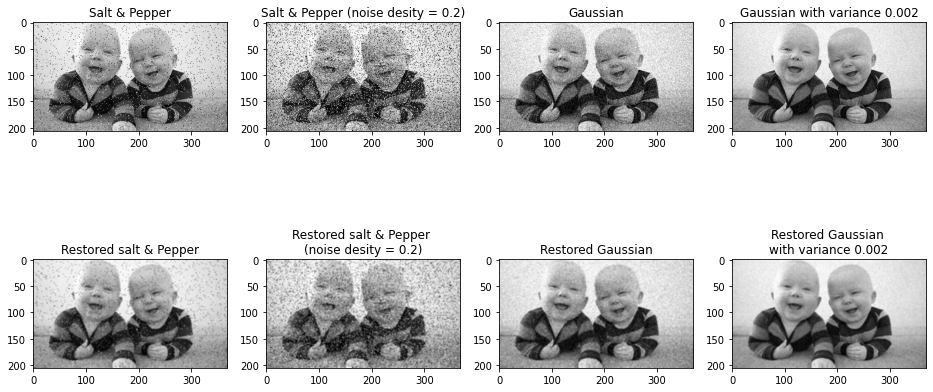

In [ ]:
from skimage import io, color
from skimage.util import random_noise

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

image_sp = random_noise(img_gray, mode='s&p', seed=None, clip=True)
image_sp2 = random_noise(img_gray, mode='s&p', seed=None, clip=True, amount = 0.2)
image_gauss = random_noise(img_gray, mode='gaussian', seed=None, clip=True)
image_gauss2 = random_noise(img_gray, mode='gaussian', seed=None, clip=True, var = 0.002)

a3 = np.array([[0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111],
               [0.1111,0.1111,0.1111]])

image_sp_a3 = cv2.filter2D(image_sp, -1, a3)
image_sp2_a3 = cv2.filter2D(image_sp2, -1, a3)
image_gauss_a3 = cv2.filter2D(image_gauss, -1, a3)
image_gauss2_a3 = cv2.filter2D(image_gauss2, -1, a3)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,8))
fig.add_subplot(2,4,1), plt.imshow(image_sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(2,4,2), plt.imshow(image_sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')
fig.add_subplot(2,4,5), plt.imshow(image_sp_a3, cmap="gray"), plt.title('Restored salt & Pepper')
fig.add_subplot(2,4,6), plt.imshow(image_sp2_a3, cmap="gray"), plt.title('Restored salt & Pepper \n(noise desity = 0.2)')

fig.add_subplot(2,4,3), plt.imshow(image_gauss, cmap="gray"), plt.title('Gaussian')
fig.add_subplot(2,4,4), plt.imshow(image_gauss2, cmap="gray"), plt.title('Gaussian with variance 0.002')
fig.add_subplot(2,4,7), plt.imshow(image_gauss_a3, cmap="gray"), plt.title('Restored Gaussian')
fig.add_subplot(2,4,8), plt.imshow(image_gauss2_a3, cmap="gray"), plt.title('Restored Gaussian \nwith variance 0.002')
plt.show()

Median filtering

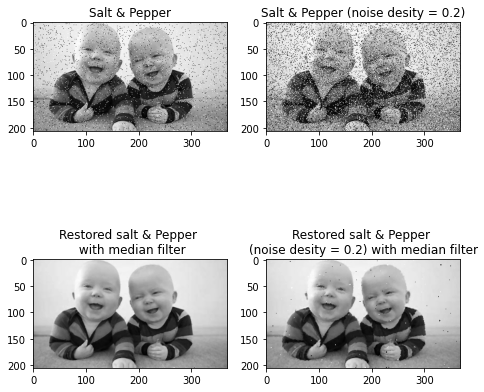

In [ ]:
from skimage import io, color
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

image_sp = random_noise(img_gray, mode='s&p', seed=None, clip=True)
image_sp2 = random_noise(img_gray, mode='s&p', seed=None, clip=True, amount = 0.2)
image_sp = np.array(255*image_sp, dtype = 'uint8')
image_sp2 = np.array(255*image_sp2, dtype = 'uint8')

fig = plt.figure(figsize = (16,8))
fig.add_subplot(2,4,1), plt.imshow(image_sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(2,4,2), plt.imshow(image_sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')

image_md = cv2.medianBlur(image_sp,3)
image_md2 = cv2.medianBlur(image_sp2,3)
fig.add_subplot(2,4,5), plt.imshow(image_md, cmap="gray"), plt.title('Restored salt & Pepper \n with median filter')
fig.add_subplot(2,4,6), plt.imshow(image_md2, cmap="gray"), plt.title('Restored salt & Pepper \n(noise desity = 0.2) with median filter')
plt.show()

Median filter and Gaussian filter

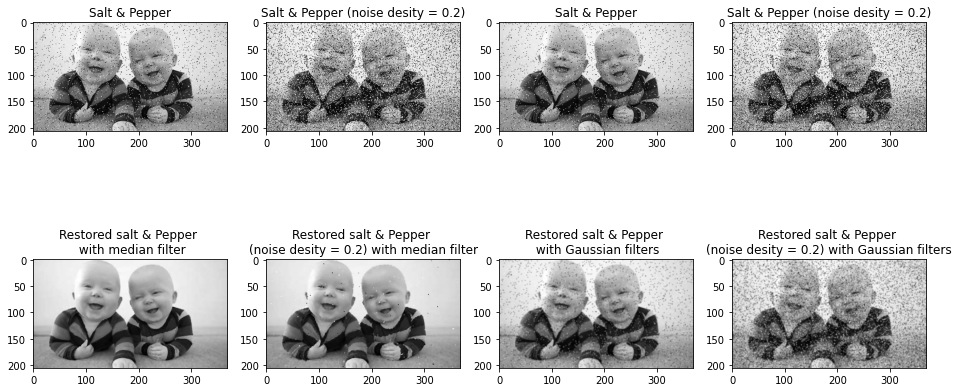

In [ ]:
from skimage import io, color
from skimage.util import random_noise
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = io.imread("twins.jpg")
img_gray = color.rgb2gray(img)

image_sp = random_noise(img_gray, mode='s&p', seed=None, clip=True)
image_sp2 = random_noise(img_gray, mode='s&p', seed=None, clip=True, amount = 0.2)
image_sp = np.array(255*image_sp, dtype = 'uint8')
image_sp2 = np.array(255*image_sp2, dtype = 'uint8')

fig = plt.figure(figsize = (16,8))
fig.add_subplot(2,4,1), plt.imshow(image_sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(2,4,2), plt.imshow(image_sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')

image_md = cv2.medianBlur(image_sp,3)
image_md2 = cv2.medianBlur(image_sp2,3)
fig.add_subplot(2,4,5), plt.imshow(image_md, cmap="gray"), plt.title('Restored salt & Pepper \n with median filter')
fig.add_subplot(2,4,6), plt.imshow(image_md2, cmap="gray"), plt.title('Restored salt & Pepper \n(noise desity = 0.2) with median filter')

fig.add_subplot(2,4,3), plt.imshow(image_sp, cmap="gray"), plt.title('Salt & Pepper')
fig.add_subplot(2,4,4), plt.imshow(image_sp2, cmap="gray"), plt.title('Salt & Pepper (noise desity = 0.2)')

image_gauss = cv2.GaussianBlur(image_sp,(3,3),0)
image_gauss2 = cv2.GaussianBlur(image_sp2,(3,3),0)
fig.add_subplot(2,4,7), plt.imshow(image_gauss, cmap="gray"), plt.title('Restored salt & Pepper \n with Gaussian filters')
fig.add_subplot(2,4,8), plt.imshow(image_gauss2, cmap="gray"), plt.title('Restored salt & Pepper \n(noise desity = 0.2) with Gaussian filters')
plt.show()